In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["font.size"] = 12

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Add 4th wave packet (frequency = 4 and time_shift = 7 cycles). Demonstrate the effect on the plot of the FFT spectrum.

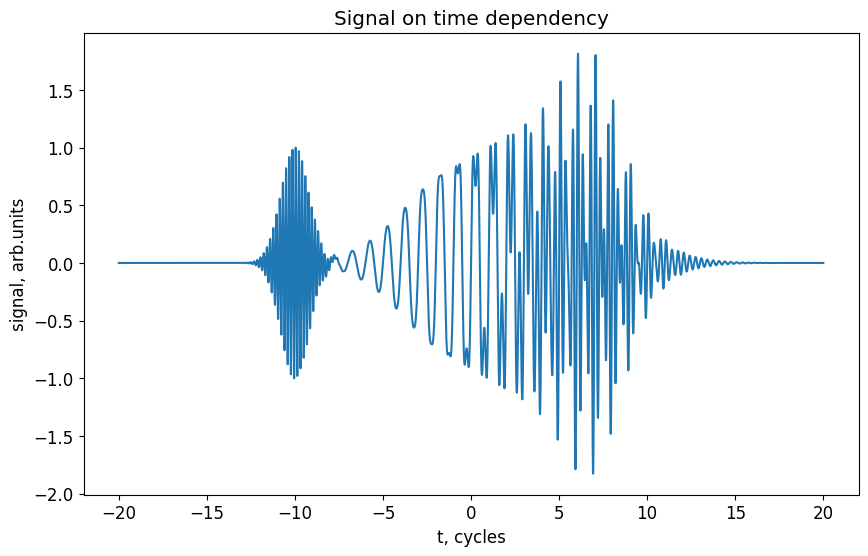

In [4]:
# generate the signal
t = np.linspace(-20*2*np.pi, 20*2*np.pi, 3**9+6)

y = np.sin(t)*np.exp(-t**2/2/20**2)
y += np.sin(3*t)*np.exp(-(t-5*2*np.pi)**2/2/20**2)
y += np.sin(5.5*t)*np.exp(-(t+10*2*np.pi)**2/2/5**2)
y += np.sin(4*t)*np.exp(-(t-7*2*np.pi)**2/2/10**2) # added 4th wave packet

plt.title('Signal on time dependency');
plt.plot(t/2/np.pi,y)
plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')
plt.show()

Text(0, 0.5, 'Power spectrum, arb. units')

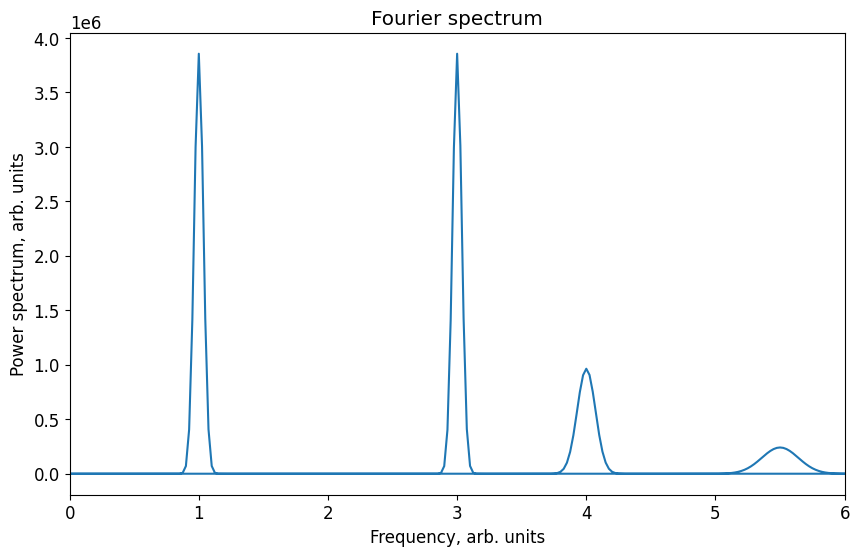

In [5]:
# Fourier spectrum
sp = np.fft.fft(y)
w = np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/np.pi)
plt.plot(w, abs(sp)**2)
plt.xlim(0,6)
plt.title('Fourier spectrum');
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units')


### 2.Implement the spectrogram, show the effect of (1) on the spectrogram. Don’t forget to label the axes

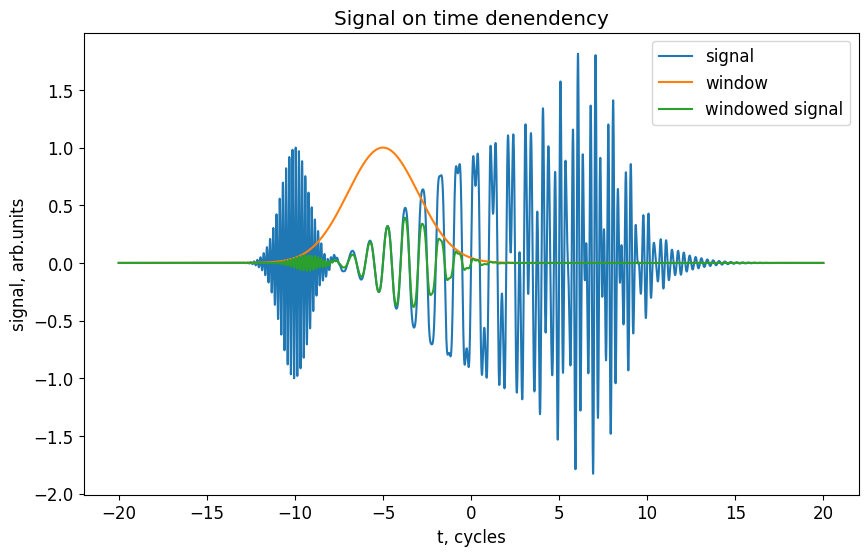

In [6]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=2.0*2*np.pi
window_position=-5.0*2*np.pi
window_function=np.exp(-(t-window_position)**2/2/window_width**2)

y_window=y * window_function

plt.title('Signal on time denendency');
plt.plot(t/2/np.pi, y, label = 'signal')
plt.plot(t/2/np.pi, window_function, label = 'window')
plt.plot(t/2/np.pi, y_window , label = 'windowed signal')
plt.legend()
plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')
plt.show()


In [7]:
def get_specgram(y, t, nwindowsteps=1000):
  window_t = np.linspace(-20*2*np.pi, 20*2*np.pi, nwindowsteps)
  specgram = np.zeros((len(t), nwindowsteps))
  window_width = 2.0 * 2 * np.pi

  for n, w_t in enumerate(window_t):
    window_function = np.exp(-(t - w_t) ** 2 / 2 / window_width ** 2)
    specgram[:, n] = abs(np.fft.fft(y * window_function))

  return specgram

In [8]:
#unmodified waves
y = np.sin(t)*np.exp(-t**2/2/20**2)
y += np.sin(3*t)*np.exp(-(t-5*2*np.pi)**2/2/20**2)
y += np.sin(5.5*t)*np.exp(-(t+10*2*np.pi)**2/2/5**2)

#modified
y_m = y +  np.sin(4*t)*np.exp(-(t-7*2*np.pi)**2/2/10**2) # added 4th wave packet

specgram = get_specgram(y, t, 1000)
specgram_m = get_specgram(y_m, t, 1000)

w = np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/np.pi)
w_m = np.fft.fftfreq(len(y_m), d=(t[1]-t[0])/2/np.pi)

Text(0, 0.5, 'Frequency, arb. units')

<Figure size 1000x600 with 0 Axes>

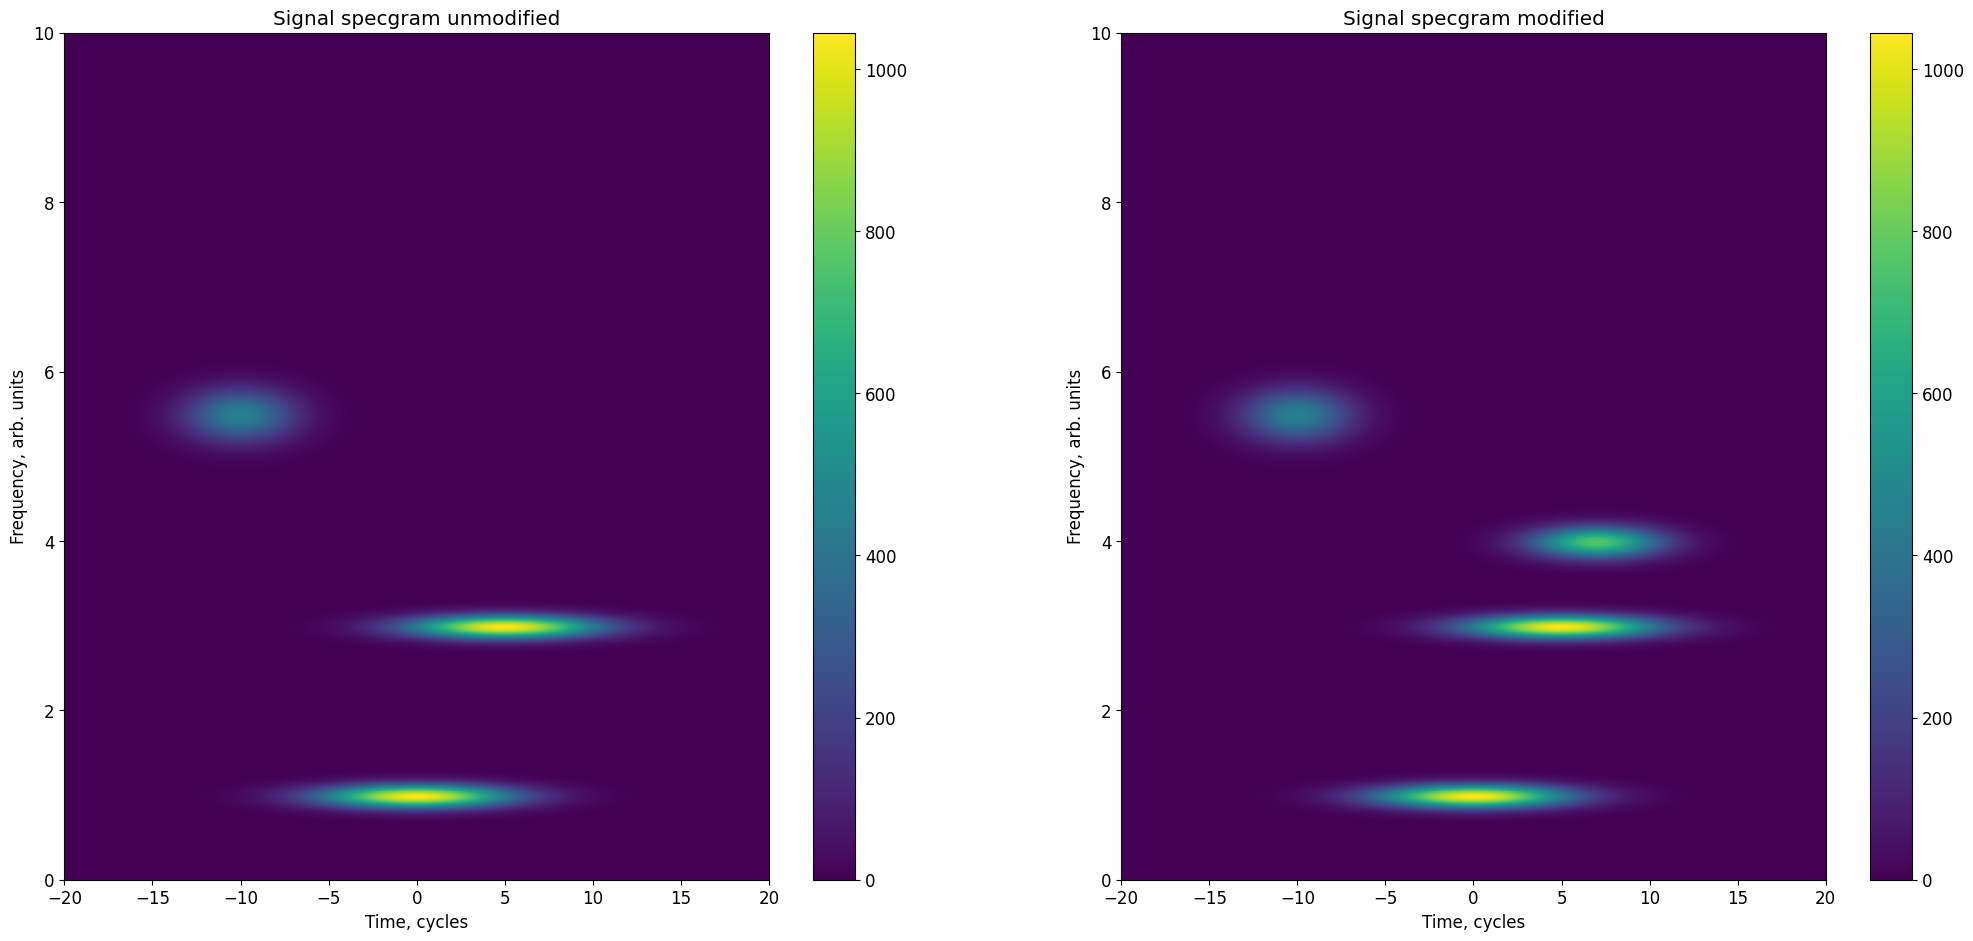

In [9]:
plt.tight_layout(pad = 1.0)
plt.figure(figsize = (25,11))
plt.subplot(1, 2, 1)
plt.imshow(specgram, aspect='auto', extent=[min(t)/(2*np.pi), max(t)/(2*np.pi), w[0] , 2 * w[int(len(w)/2)-1]])
plt.colorbar()
plt.ylim(0,10)
plt.tick_params(axis='both')
plt.title('Signal specgram unmodified')
plt.xlabel('Time, cycles')
plt.ylabel('Frequency, arb. units')

plt.subplot(1, 2, 2)
plt.imshow(specgram_m, aspect='auto', extent=[min(t)/(2*np.pi), max(t)/(2*np.pi), w_m[0] , 2 * w_m[int(len(w_m)/2)-1]])
plt.colorbar()
plt.ylim(0,10)
plt.tick_params(axis='both')
plt.title('Signal specgram modified')
plt.xlabel('Time, cycles')
plt.ylabel('Frequency, arb. units')


The spectrogram visually represents the magnitude of the windowed discrete-time Fourier transform applied to a signal. Each spot on the spectrogram provides insight into the presence of waves, specifically sine functions, and their impact on the amplitude of the signal. The brightness of a spot correlates with the amplitude of the corresponding wave – brighter spots indicate higher amplitudes.

### 3.Change the number of time steps in your signal to the power of 2 (i.e. 2^14) and then slightly change the number of timesteps (i.e 2^14 +- 5). Measure the timing, can you explain the difference? Write something as a possible explanation.

In [10]:
timesteps = [2**14 + i for i in range (-5,6 )]
i = -5
for steps in timesteps:
    t = np.linspace(-20*2*np.pi, 20*2*np.pi, steps)
    y = np.sin(t)*np.exp(-t**2/2/20**2)
    y += np.sin(3*t)*np.exp(-(t-5*2*np.pi)**2/2/20**2)
    y += np.sin(5.5*t)*np.exp(-(t+10*2*np.pi)**2/2/5**2)
    y +=  np.sin(4*t)*np.exp(-(t-7*2*np.pi)**2/2/10**2)

    print(f"Timestep: 2**14 +({i}) ,\n")
    i+=1
    %timeit get_specgram(y, t)


Timestep: 2**14 +(-5) ,

3.82 s ± 1.21 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
Timestep: 2**14 +(-4) ,

1.66 s ± 562 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Timestep: 2**14 +(-3) ,

3.95 s ± 588 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Timestep: 2**14 +(-2) ,

3.15 s ± 503 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Timestep: 2**14 +(-1) ,

2.01 s ± 380 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Timestep: 2**14 +(0) ,

1.3 s ± 232 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Timestep: 2**14 +(1) ,

1.89 s ± 328 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Timestep: 2**14 +(2) ,

3.16 s ± 566 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Timestep: 2**14 +(3) ,

3.15 s ± 748 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Timestep: 2**14 +(4) ,

3.44 s ± 727 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Timestep: 2**14 +(5) ,

3.35 s ± 595 ms per loop (mean ± std. dev. of 7 runs, 1 loop e

The difference arises from the superior performance speed of the Fast Fourier Transform (FFT) when the input size is a power of $2$. Utilizing a power of $2$ enables the FFT to be executed in $O(N \log N)$ time complexity, as opposed to the $O(N^2)$ complexity when not adhering to this power-of-$2$ constraint.